<a href="https://colab.research.google.com/github/kunalr33/SOC_RlForAgents/blob/main/week4_MNISTdigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [2]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Add a channel dimension (for grayscale images)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [5]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # First convolutional layer with 32 filters, 3x3 kernel size, ReLU activation
    layers.MaxPooling2D((2, 2)), # First max pooling layer with 2x2 pool size
    layers.Conv2D(64, (3, 3), activation='relu'), # Second convolutional layer with 64 filters, 3x3 kernel size, ReLU activation
    layers.MaxPooling2D((2, 2)), # Second max pooling layer with 2x2 pool size
    layers.Conv2D(64, (3, 3), activation='relu'), # Third convolutional layer with 64 filters, 3x3 kernel size, ReLU activation
    layers.Flatten(), # Flatten the output from the convolutional layers to feed into dense layers
    layers.Dense(64, activation='relu'), # Fully connected dense layer with 64 neurons, ReLU activation
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class), softmax activation
])

In [7]:
# Compile the model
model.compile(optimizer='adam', # Use Adam optimizer
              loss='categorical_crossentropy', # Use categorical cross-entropy loss
              metrics=['accuracy']) # Track accuracy during training

# Display model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [8]:
# Train the model for 10 epochs with batch size of 64, using validation data for validatio
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 87s 90ms/step - loss: 0.1743 - accuracy: 0.9482 - val_loss: 0.0528 - val_accuracy: 0.9827
Epoch 2/10
938/938 [==============================] - 64s 69ms/step - loss: 0.0504 - accuracy: 0.9845 - val_loss: 0.0387 - val_accuracy: 0.9878
Epoch 3/10
938/938 [==============================] - 64s 68ms/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.0325 - val_accuracy: 0.9885
Epoch 4/10
938/938 [==============================] - 58s 61ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0317 - val_accuracy: 0.9892
Epoch 5/10
938/938 [==============================] - 56s 59ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0339 - val_accuracy: 0.9883
Epoch 6/10
938/938 [==============================] - 58s 61ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0312 - val_accuracy: 0.9898
Epoch 7/10
938/938 [==============================] - 58s 62ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.0264 - val_accuracy:

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 3s - loss: 0.0316 - accuracy: 0.9906 - 3s/epoch - 11ms/step

Test accuracy: 0.9905999898910522


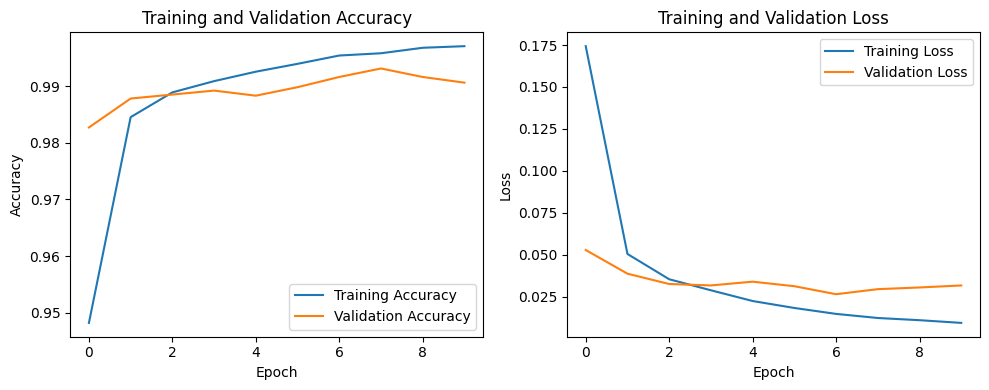

In [10]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(10, 4))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Predictions and evaluation metrics
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

313/313 [==============================] - 4s 11ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Confusion Matrix:
[[ 976    1    0    0    1    0    1    1    0    0]
 [   0 1133    0    2    0    0    0    0    0    0]
 [   0    0 1023    2    1    0    1

Saving 2.png to 2 (1).png
Saving 2b.png to 2b (1).png
Saving 3.png to 3 (1).png
Saving 3b.png to 3b (1).png
Saving 6.png to 6 (1).png
Saving 6b.png to 6b (1).png
Saving 8.png to 8 (1).png
Saving 8b.png to 8b (1).png
1/1 [==============================] - 0s 23ms/step


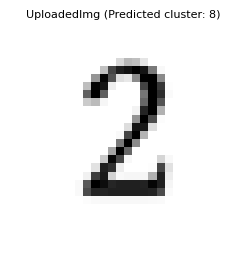

1/1 [==============================] - 0s 21ms/step


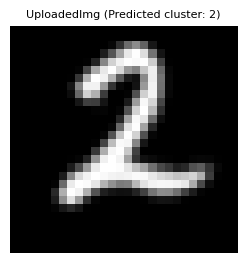

1/1 [==============================] - 0s 25ms/step


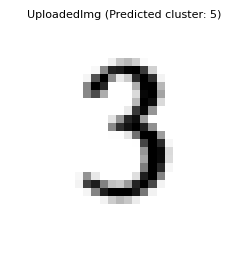

1/1 [==============================] - 0s 22ms/step


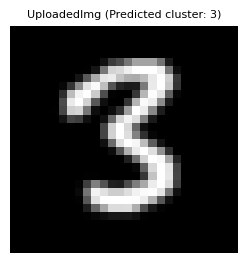

1/1 [==============================] - 0s 21ms/step


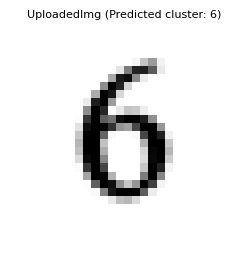

1/1 [==============================] - 0s 32ms/step


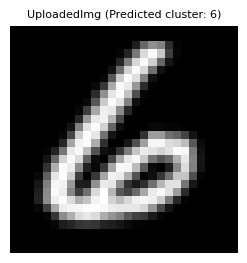

1/1 [==============================] - 0s 32ms/step


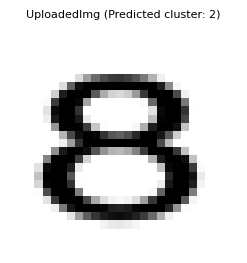

1/1 [==============================] - 0s 30ms/step


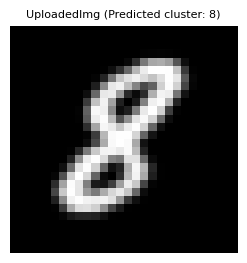

In [14]:
from PIL import Image, ImageOps
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

# Upload multiple files
uploaded = files.upload() # Upload files through Google Colab interface

# Iterate through each uploaded file
for file_name in uploaded.keys():
    image = Image.open(file_name).convert('L') # Open the uploaded image and convert to grayscale
    scaled_image = image.resize((28, 28)) # Resize the image to 28x28 pixels
    image_array = np.array(scaled_image) # Convert the image to a numpy array
    image_array = image_array.reshape(-1, 28, 28, 1) / 255.0 # Reshape and normalize the image array
    predicted_label = np.argmax(model.predict(image_array)[0]) # Predict the label for the image

    # Display the uploaded image and predicted label
    plt.figure(figsize=(5, 5))

    # Plot the uploaded image
    plt.subplot(1, 2, 1)
    plt.imshow(scaled_image, cmap='gray') # Show the scaled image in grayscale
    plt.axis('off') # Hide the axis
    plt.title(f"UploadedImg (Predicted cluster: {predicted_label})",fontsize=8) # Display the predicted label as title

    plt.tight_layout()
    plt.show()